# Project: What May Cause Movie Box Office Success

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will analyse what may cause movie box office success (or, at very least, is highly correlated with it).  Success here is **maximising box office revenues**.

The analysis is completed using The Movie Database (TMDb) movie data containing over 10,000 movies, provided by Udacity, based on [Kaggle dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata).  

There are some data quality issues (such as "Are the budgets and revenues all in US dollars? Do they consistently show the global revenues?" from Kaggle), which I will not investigate (only some), but are highlighted for limitation considations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# load data
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
# check for sublicates -- will need to delete if any
sum(df.duplicated())

1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Observations
- the missing values exist in:
  - **variables that may be used for analysis**
  - 'director' -- some values missing, but only about 44, thus given overall sample of 10866, this is not significant, and will drop those rows
  - 'genres' -- some values missing, but only about 23, thus given overall sample of 10866, this is not significant, and will drop those rows
  - 'production companies' -- quite a few values missing, about 1030, given an overall sample of 10866, this is not little, but still a solid analysis can be done (before dropping will check for other correlations, e.g. existence of budget/revenue figures, so as not to shrink the sample too much) 
  
  - **variables not used in analysis**
  - 'imdb_id' -- id irrelevant for analysis, as we're not going to search for additional data
  - 'cast' -- will not use for analysis, but this is a **limitation** because much depends on cast
  - 'homepage' -- many values missing, but will not use in analysis, will drop the column
  - 'tagline', 'keywords', 'overview' -- some values missing, will not use for analysis, but this is a **limitation** because there is likely to be correlation between subject and success in box office


In [7]:
# check how many movies were done by popular/productive directors
directors = df.director.value_counts() > 10
dir_index = directors[directors == True].index
df_pop = df[df.director.isin(dir_index)]
df_pop.shape

(1307, 21)

#### Observations

I will investigate if the more "productive" director (i.e. director movie count) correlates to higher box office success, or look at individual directors lifetime achievements, later in the report

In [8]:
# check all variables associated with a sample movie (some hidden in .head() function)
df.sample(1).values

array([[281298, 'tt3419894', 0.20534299999999997, 0, 0,
        'ì‹\xa0ì˜ í•œ ìˆ˜',
        'Lee Beom-soo|Jung Woo-Sung|Lee Si-young|Ahn Sung-Ki|Kim In-Kwon',
        nan, 'Cho Beom-gu', nan, 'prison|gambling|knife|revenge|murder',
        'Professional baduk (go) player Tae-seok loses a high-stakes game to infamous underground gambler Sal-soo, and ends up framed for the murder of his own brother and locked up in prison. He vows revenge and trains ferociously. After serving his seven-year sentence, he gets in touch with his brother\'s former associate "Tricks," hermit and blind master player "The Lord," and skillful junkyard owner Mok-su; together, they begin formulating a plan to get back at Sal-soo and his men. Tae-seok slowly penetrates Sal-soo\'s inner circle and his gambling joint, and eliminates Sal-soo\'s men one by one. But Sal-soo discovers Tae-seok\'s true identity and engages him in one final game that will seal the fates of the two men involved.',
        118, 'Action|Crime

In [9]:
df.production_companies.value_counts().head(10)

Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Metro-Goldwyn-Mayer (MGM)                  72
Columbia Pictures                          72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
Name: production_companies, dtype: int64

In [10]:
df.genres.value_counts().head(10)

Drama                   712
Comedy                  712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

#### Observations
In order to use 'ganres' and 'production_companies' will either need to 'unconcatinate' these (and, for example, use dummy variables), or indeed have separate categories allowing for multiple values in them.

In [11]:
# check for how many movies budget and revenue info are zeros
sum(df.revenue == 0), sum(df.budget == 0), sum(df.revenue_adj == 0), sum(df.budget_adj == 0)

(6016, 5696, 6016, 5696)

#### Observation
Nearly 2/3rds of the movies have no budget and revenue information, so as we are investigating what causes big blockbusters, we'll be losing 2/3 of the dataset.
This also suggests that any further cuts to data (eg due to missing production company entry or otherwise, will need to be considered caregfully) 

### Data Cleaning (Replace this with more specific notes!)

#### Cleaning steps:
1) Drop duplicated row 

2) Drop columns definitely not used in analysis and in later visualisations ('imdb_id', 'homepage', 'tagline', 'keywords', 'overview')

3) Drop rows with missing values of 'director' and 'genres'

4) Potentially drop all rows with zero value budget and revenues
> investigate any correlations why those values may be missing beforehand

5) Potentially drop all rows with no value for production company
> investigate how it will impact size of remaining dataset and correlations

6) Extract a month value from release date -- I expect annual seasonality could impact box office revenues

7) Extract values in 'genres' and 'production_companies' into separate dataframes for later use (will not connect these dataframes to main table/dataframe, because of tidyness issues)


### (1)

In [12]:
df.drop_duplicates(inplace=True)

### (2)

In [13]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'],axis=1,inplace=True)

### (3)

In [14]:
df = df[~df.director.isnull()]

In [15]:
df = df[~df.genres.isnull()]

### (4)

In [16]:
print(df.shape)
df.head()

(10800, 16)


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
# check how many movies revenue info are NOT zeros, and if they overlap
sum(df.revenue != 0), sum(df.revenue_adj != 0), sum((df.revenue != 0)&(df.revenue_adj != 0))

(4848, 4848, 4848)

This is good, indicates 'symetry' between revenue and adj_revenue

In [18]:
# check how many movies budget info are NOT zeros, and if they overlap
# this is relevant, because if budget (or adjusted budget) is to be used as one of the dependent variables, it's important 
# that the variable pair (budget and revenue or adj. budget and adj. revenue) have 'valid' values (e.g. not only zeros)
sum(df.budget != 0), sum(df.budget_adj != 0), sum((df.budget != 0)&(df.budget_adj != 0))

(5164, 5164, 5164)

This is good, indicates 'symetry' between budget and adj_budget

In [19]:
# check for correlation between revenue and adjusted revenue, and budget and adjusted budget
df[['revenue','revenue_adj']].corr()

,revenue,revenue_adj
revenue,1.000000,0.919051
revenue_adj,0.919051,1.000000


In [20]:
#compute how many rows were lost if we dropped rows where adj. revenue is non-zero, but adj. budget is zero
sum(df.revenue_adj != 0) - sum((df.budget_adj != 0)&(df.revenue_adj != 0))

995

#### Observation
Since:
- correlations are really high (i.e. correlation coefficient is approx 0.92) and 
- adjusted figure will give a more accurate comparison when comparing movie success accross long period of time (as it takes into account inflation and is computed in 2010 terms)

Will:
- keep adjusted revenue (and adjusted budget), 
- will drop 'revenue' and will drop 'budget' (because adjusted revenue should be compared to adjusted budget, but not to 'unadjusted' budget); and 
- will drop all rows containing zero adjusted revenue,
- note, will keep rows containing zero budget, as this would result in loss of nearly 20% of sample, and, as budget is not the only independent variable, this is non-essential for accurate analysis

In [21]:
# will drop 'revenue' column, and will drop rows that have zero revenue_adj
df.drop(['revenue','budget'],axis=1,inplace=True)
df = df[(df.revenue_adj != 0)]
print(df.shape)
df.head()

(4848, 14)


,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### (5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4848 entries, 0 to 10848
Data columns (total 14 columns):
id                      4848 non-null int64
popularity              4848 non-null float64
original_title          4848 non-null object
cast                    4843 non-null object
director                4848 non-null object
runtime                 4848 non-null int64
genres                  4848 non-null object
production_companies    4752 non-null object
release_date            4848 non-null object
vote_count              4848 non-null int64
vote_average            4848 non-null float64
release_year            4848 non-null int64
budget_adj              4848 non-null float64
revenue_adj             4848 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 568.1+ KB


#### Observation
Looks like deleting rows with no production company info would only cause a loss of 96 rows, so I will go ahead with it.

In [23]:
df = df[~df.production_companies.isnull()]

In [24]:
df.shape

(4752, 14)

### (6)

In [25]:
df.release_date.value_counts().head(10)

12/25/14    7
9/11/15     6
9/12/14     6
9/30/11     6
12/25/13    6
9/7/12      6
2/6/09      6
9/16/05     6
9/10/10     5
10/5/01     5
Name: release_date, dtype: int64

In [26]:
type(df.release_date[0])

str

In [27]:
df.release_date = pd.to_datetime(df.release_date)
df['release_month'] = df.release_date.dt.month

In [28]:
print(sum(df.release_month.value_counts()))
df.release_month.value_counts()

4752


9     595
12    482
10    448
8     424
6     404
7     374
3     364
5     361
11    359
4     338
2     316
1     287
Name: release_month, dtype: int64

### (7)

In [29]:
def separate_by_pipe(data_series):
    return data_series.str[0:].str.split('|',expand=True, )

genres = separate_by_pipe(df['genres'])

genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [30]:
genres.rename({0:'Genre_0', 1:'Genre_1', 2:'Genre_2', 3:'Genre_3', 4:'Genre_4'}, axis=1, inplace=True)
genres.head(1)

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4
0,Action,Adventure,Science Fiction,Thriller,None


In [31]:
production_companies = separate_by_pipe(df['production_companies'])
production_companies.head()

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [32]:
production_companies.rename({0:'ProductionCo_0', 1:'ProductionCo_1', 2:'ProductionCo_2', 3:'ProductionCo_3', 4:'ProductionCo_4'}, axis=1, inplace=True)
production_companies.head(1)

,ProductionCo_0,ProductionCo_1,ProductionCo_2,ProductionCo_3,ProductionCo_4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


### Dataset's last check before analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 10848
Data columns (total 15 columns):
id                      4752 non-null int64
popularity              4752 non-null float64
original_title          4752 non-null object
cast                    4750 non-null object
director                4752 non-null object
runtime                 4752 non-null int64
genres                  4752 non-null object
production_companies    4752 non-null object
release_date            4752 non-null datetime64[ns]
vote_count              4752 non-null int64
vote_average            4752 non-null float64
release_year            4752 non-null int64
budget_adj              4752 non-null float64
revenue_adj             4752 non-null float64
release_month           4752 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 754.0+ KB


In [34]:
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


<a id='eda'></a>
## Exploratory Data Analysis

### What causes movie box office success?

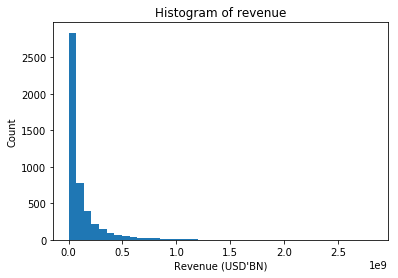

In [35]:
#Quick look first at revenue distribution
plt.hist(df.revenue_adj, bins=40)
plt.title('Histogram of revenue')
plt.xlabel('Revenue (USD'"'BN)")
plt.ylabel('Count');

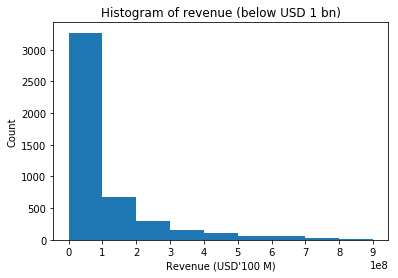

In [36]:
#regularise bins in $100 million lots, cut long tail
bins = np.arange(0,1*10**9,10**8)
plt.hist(df.revenue_adj, bins = bins)
plt.xticks(bins)
plt.title('Histogram of revenue (below USD 1 bn)')
plt.xlabel('Revenue (USD'"'100 M)")
plt.ylabel('Count');

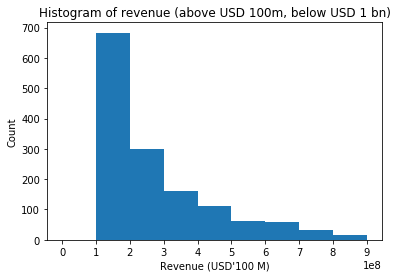

In [37]:
#let's check "super" block busters, attaning revenues in access of 100 million, below 1 billion
bins = np.arange(0,1*10**9,10**8)
plt.hist(df.revenue_adj[df.revenue_adj > 10**8], bins=bins)
plt.xticks(bins)
plt.title('Histogram of revenue (above USD 100m, below USD 1 bn)')
plt.xlabel('Revenue (USD'"'100 M)")
plt.ylabel('Count');

In [38]:
#let's just look at count and values of movies grossing above a billion
df[df.revenue_adj > 10**9].id.count()

44

In [39]:
df.original_title[df.revenue_adj > 10**9].values

array(['Jurassic World', 'Star Wars: The Force Awakens', 'Furious 7',
       'Minions', 'Avengers: Age of Ultron', 'Star Wars',
       'Close Encounters of the Third Kind', 'Avatar',
       'Alice in Wonderland', 'Toy Story 3',
       'Star Wars: Episode I - The Phantom Menace',
       'The Lord of the Rings: The Fellowship of the Ring',
       "Harry Potter and the Philosopher's Stone", 'The Dark Knight',
       'Harry Potter and the Deathly Hallows: Part 2',
       'Transformers: Dark of the Moon',
       'The Lord of the Rings: The Two Towers',
       'Harry Potter and the Chamber of Secrets', 'The Lion King',
       'The Avengers', 'The Dark Knight Rises', 'Skyfall',
       'The Lord of the Rings: The Return of the King', 'Finding Nemo',
       'Titanic', 'Frozen', 'Iron Man 3',
       'Harry Potter and the Goblet of Fire',
       "Pirates of the Caribbean: Dead Man's Chest", 'Shrek 2',
       'The Godfather', 'The Empire Strikes Back',
       "Pirates of the Caribbean: At World's 

#### Observations

- Movie revenues are highly scewed to the right;
- Over half the movies do not make more than 50 million;
- The scew is little less sevier from 100m to 1 billion;
- There are only 44 movies that made more than 1 billion

In [40]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4.752000e+03,4.752000e+03,4752.000000
mean,44381.072180,1.061523,108.149200,444.651726,6.150526,2000.829756,3.580858e+07,1.173238e+08,6.980219
std,72397.816131,1.365493,21.108929,812.519096,0.796408,11.625527,4.395864e+07,2.002502e+08,3.358034
min,5.000000,0.001783,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00,1.000000
25%,8138.250000,0.401694,95.000000,49.000000,5.600000,1994.000000,2.912701e+06,1.163448e+07,4.000000
50%,11976.500000,0.693963,105.000000,153.000000,6.200000,2004.000000,2.103337e+07,4.572316e+07,7.000000
75%,43919.250000,1.225666,118.000000,446.000000,6.700000,2010.000000,5.039101e+07,1.348632e+08,10.000000
max,417859.000000,32.985763,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000


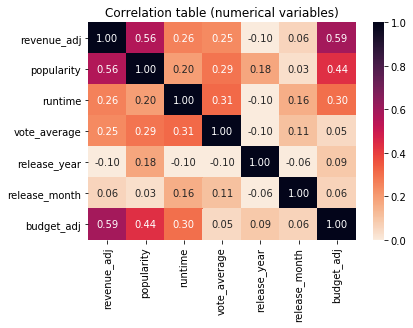

In [41]:
#lets check correlations of all numeric variables
numeric = ['revenue_adj', 'popularity', 'runtime', 'vote_average', 'release_year', 'release_month', 'budget_adj']
sns.heatmap(df[numeric].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0)
plt.title('Correlation table (numerical variables)');

#### Observation
According to above correlation table, the most correlated (with revenue) numeric variables are **budget (adj), popularity, runtime, vote average**;  

because **pupularity** and **vote average** are just other measures of success (and are variables that result AFTER the movie is produced), **I will not investigate these further**; 

plus there are high chances that pupularity itself is computed using revenue (it could be a mix of revenue, vote average, critic ratings and other)

there seems to be no correlation between **release_month** and revenue; however, I believe and will test if, for example, December, July-August, corresponding to holidays of Christmas and summer holidays respectively, have an impact, thus I will focus also on this variable

And for general understanding of data, will also have a quick look at **release_year**.

### Release year

Starting independent variable analysis with release year, because, after understanding movie distribution (within the database) according to their release year, will also be able to do further analysis (accross all variables) by decade and/or another relevant time buckets. 

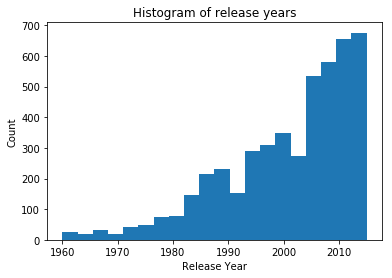

In [42]:
plt.hist(df.release_year, bins=20)
plt.title('Histogram of release years')
plt.xlabel('Release Year')
plt.ylabel('Count');

#### Observation
Movie dataset is scewed, and has more entries in later years (i.e. ~2005 onwards).

In [43]:
# will create bins for each decade, will group first three decares into one, as there are far fewer movies there
df['decade_bins'] = pd.cut(x=df['release_year'], bins=[1959, 1989, 1999,2009,2019])
df.decade_bins.value_counts().index

CategoricalIndex([(1999, 2009], (2009, 2019], (1989, 1999], (1959, 1989]], categories=[(1959, 1989], (1989, 1999], (1999, 2009], (2009, 2019]], ordered=True, dtype='category')

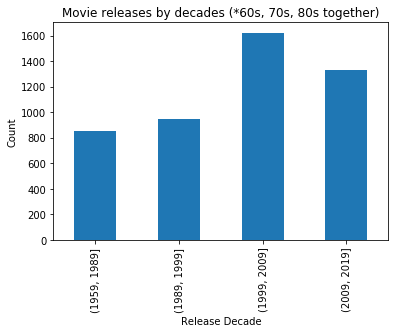

In [44]:
df.decade_bins.value_counts().sort_index().plot(kind='bar')
plt.title('Movie releases by decades (*60s, 70s, 80s together)')
plt.xlabel('Release Decade')
plt.ylabel('Count');

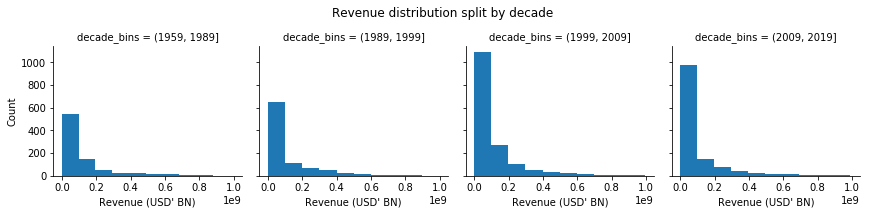

In [45]:
# will check the histogram of revenue for each decade
decade_plt = sns.FacetGrid(df[df.revenue_adj < 10**9], col="decade_bins")
decade_plt.map(plt.hist, "revenue_adj")
decade_plt.set_axis_labels("Revenue (USD' BN)",'Count')
plt.subplots_adjust(top=0.8)
decade_plt.fig.suptitle('Revenue distribution split by decade');

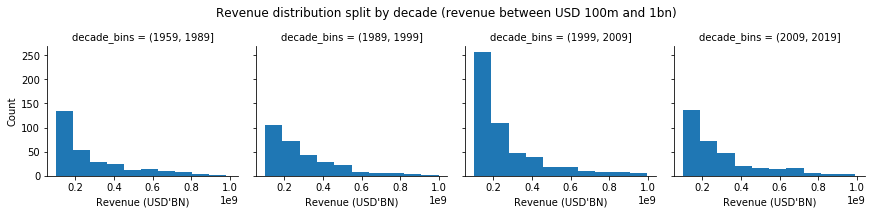

In [46]:
#will exclude movies grossing above a billion, and below 100 million
decade_plt = sns.FacetGrid(df[(df.revenue_adj < 10**9)&(df.revenue_adj > 10**8)], col="decade_bins")
decade_plt.map(plt.hist, "revenue_adj")
decade_plt.add_legend()
decade_plt.set_axis_labels("Revenue (USD'BN)",'Count')
plt.subplots_adjust(top=0.8)
decade_plt.fig.suptitle('Revenue distribution split by decade (revenue between USD 100m and 1bn)');

#### Observation

All decades have right scewed movie revenue distributions,

the 2000-2009 have move movies (in the database), and more of them are ending up in 0-200 million range,

if anything 2010-2019 perhaps has a slightly fatter tail from 400 million range onwards.

### Release Month

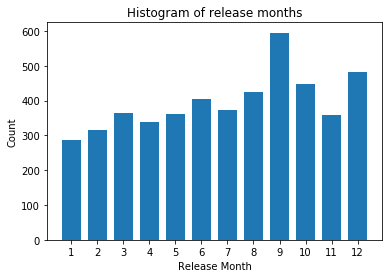

In [47]:
plt.hist(df.release_month, bins = np.arange(1,14,1), align='left', rwidth=0.7)
plt.xticks(np.arange(1,13,1))
plt.title('Histogram of release months')
plt.xlabel('Release Month')
plt.ylabel('Count');

#### Observation

Movies are roughly equally distributed by release month, with slight increase as the year goes on and with exception of more movies released in September and December.

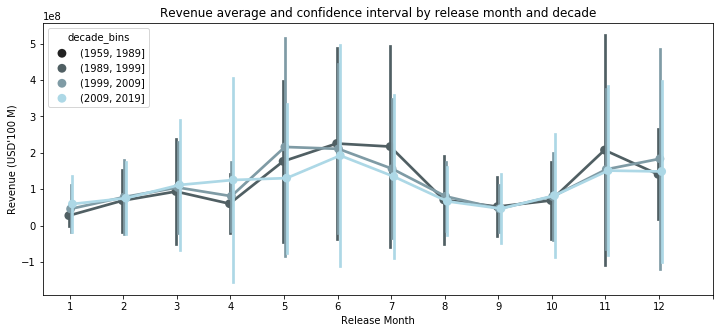

In [48]:
# Will check movie revenue distribution by month and by decade (focusing on last three decades)
# Pointplot shows a confidence interval within a standard deviation of a sample, for revenue depending on release month

plt.figure(figsize = [12,5])
sns.pointplot(data = df[df.release_year >1989], y = 'revenue_adj', x = 'release_month', hue = 'decade_bins', 
              alpha = 0.5, ci = 'sd', linestyles = "-", dodge = True, color = 'lightblue')
plt.xticks(np.arange(0,13,1))
plt.title("Revenue average and confidence interval by release month and decade")
plt.xlabel("Release Month")
plt.ylabel('Revenue (USD'"'100 M)");

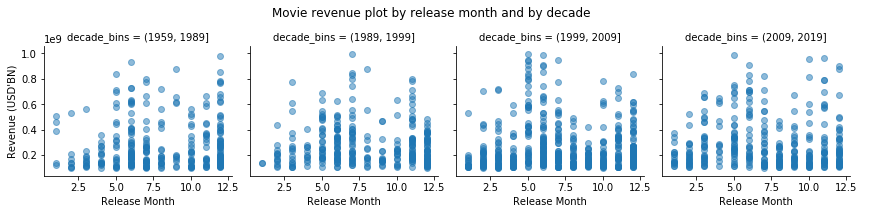

In [49]:
# will have a quick visual check of numbers of movies released in different decades, and 
# how their revenue distribution looks like

decade_plt = sns.FacetGrid(df[(df.revenue_adj < 10**9)&(df.revenue_adj > 10**8)], col="decade_bins")
decade_plt.map(plt.scatter, "release_month", "revenue_adj", alpha = 0.5)
decade_plt.add_legend()
decade_plt.set_axis_labels("Release Month","Revenue (USD'BN)")
plt.subplots_adjust(top=0.8)
decade_plt.fig.suptitle('Movie revenue plot by release month and by decade');

#### Observation

It appears that months/seasons do have a relation with box office success of movies, in particular, May, June, July and then November and December seeing higher grossing movies. 

Of course, there could be other factors at play, like that the big budget / big star / big director movies tend to be realeased in those months, nevertheless, interesting seasonal trend.

### Budget

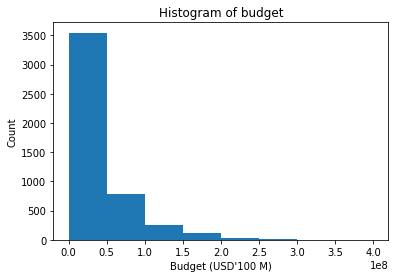

In [50]:
bins = np.arange(0, 4*10**8+1,0.5*10**8)
plt.hist(df.budget_adj, bins=bins)
plt.title('Histogram of budget')
plt.xlabel('Budget (USD'"'100 M)")
plt.ylabel('Count');

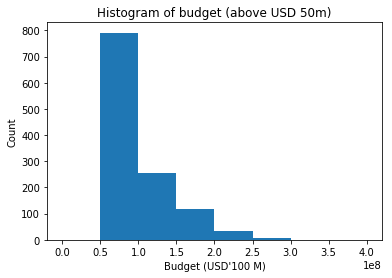

In [51]:
bins = np.arange(0, 4*10**8+1,0.5*10**8)
plt.hist(df.budget_adj[df.budget_adj>=0.5*10**8], bins=bins)
plt.title('Histogram of budget (above USD 50m)')
plt.xlabel('Budget (USD'"'100 M)")
plt.ylabel('Count');

#### Observation
As with revenues, budget is similarly scewed to the the right, with significant number of movies having smaller budgets, and then larger budget movies tailing off.

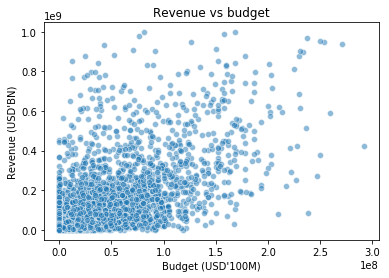

In [52]:
sns.scatterplot(data=df[(df.budget_adj<=3*10**8)&(df.revenue_adj<=1*10**9)], x='budget_adj', y='revenue_adj', alpha = 0.5)
plt.title("Revenue vs budget")
plt.xlabel("Budget (USD'100M)")
plt.ylabel("Revenue (USD'BN)");

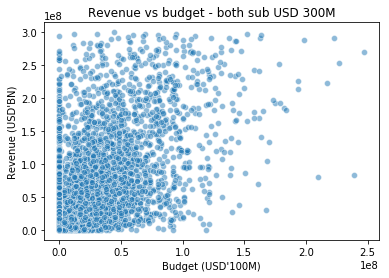

In [53]:
# zooming in
sns.scatterplot(data=df[(df.budget_adj<=3*10**8)&(df.revenue_adj<=0.3*10**9)], x='budget_adj', y='revenue_adj', alpha = 0.5)
plt.title("Revenue vs budget - both sub USD 300M")
plt.xlabel("Budget (USD'100M)")
plt.ylabel("Revenue (USD'BN)");

#### Observation

There does seem to be a positive correlation between budgets and revenues, although it is far from perfect.

Overall correlation coaefficient is 0.59.

I will look if there are any trends over time for this relationship.

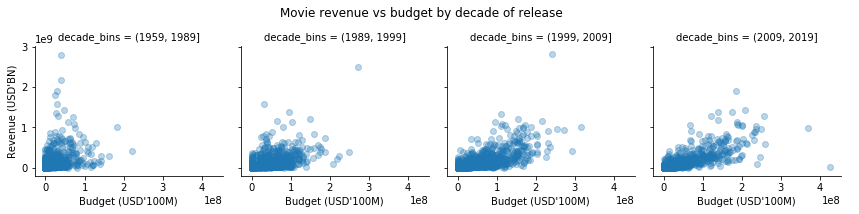

In [54]:
decade_plt = sns.FacetGrid(df, col="decade_bins")
decade_plt.map(plt.scatter, "budget_adj", "revenue_adj", alpha = 0.3)
decade_plt.add_legend()
decade_plt.set_axis_labels("Budget (USD'100M)","Revenue (USD'BN)")
plt.subplots_adjust(top=0.8)
decade_plt.fig.suptitle('Movie revenue vs budget by decade of release');

#### Observation

There is a visible increase in correlation each decade; and also increase in budgets;

quite possibly more is spent on marketing, also, because of wider distribution channels, more people know same stars, same directors, prefer similar plot lines - meaning tastes may be assimilating accorss large populations, resulting in more movies designed for success, and more success and achieving the same.

In [55]:
#budget/revenue correlation got stronger in later decades
print('(1959-1989]')
print(df[(df.release_year >1959)&(df.release_year <= 1989)][['revenue_adj','budget_adj']].corr())
print()
print('(1989-1999]')
print(df[(df.release_year >1989)&(df.release_year <= 1999)][['revenue_adj','budget_adj']].corr())
print()
print('(1999-2009]')
print(df[(df.release_year >1999)&(df.release_year <= 2009)][['revenue_adj','budget_adj']].corr())
print()
print('(2009-2019]')
print(df[(df.release_year >2009)&(df.release_year <= 2019)][['revenue_adj','budget_adj']].corr())

(1959-1989]
             revenue_adj  budget_adj
revenue_adj     1.000000    0.321338
budget_adj      0.321338    1.000000

(1989-1999]
             revenue_adj  budget_adj
revenue_adj     1.000000    0.515479
budget_adj      0.515479    1.000000

(1999-2009]
             revenue_adj  budget_adj
revenue_adj     1.000000    0.692038
budget_adj      0.692038    1.000000

(2009-2019]
             revenue_adj  budget_adj
revenue_adj     1.000000    0.770405
budget_adj      0.770405    1.000000


#### Observation

Calculation of correlation coefficient between movies budget and revenue for each decade shows that it indeed increased significantly through time, reacing 0.77 in  2010-2019.

### Runtime

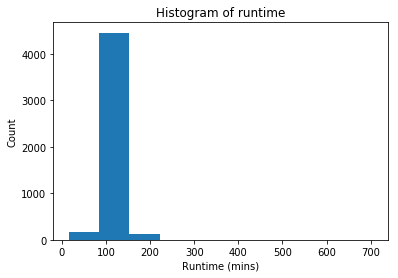

In [56]:
plt.hist(df.runtime)
plt.title('Histogram of runtime')
plt.xlabel('Runtime (mins)')
plt.ylabel('Count');

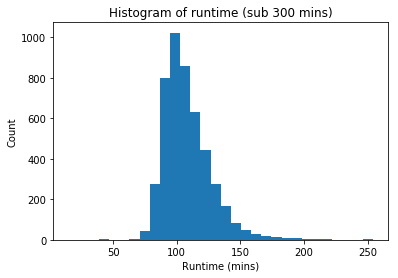

In [57]:
plt.hist(df.runtime[df.runtime < 300], bins=30)
plt.title('Histogram of runtime (sub 300 mins)')
plt.xlabel('Runtime (mins)')
plt.ylabel('Count');

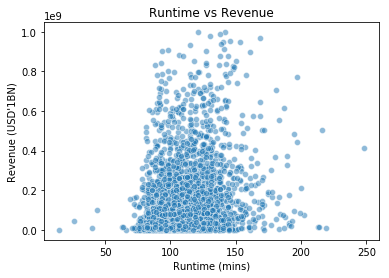

In [58]:
sns.scatterplot(data=df[(df.budget_adj<=3*10**8)&(df.revenue_adj<=1*10**9)&(df.runtime< 250)], 
                x='runtime', y='revenue_adj', alpha = 0.5)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime (mins)')
plt.ylabel("Revenue (USD'1BN)");

#### Observation

At quick examination, there doesn't appear to much relationship between revenue and runtime of a movie, and runtime distribution being bell shaped, slightly skewed to the right.

### Director

In order to analyse how a given director may influence movie revenues, I will focus on those directors that have directed more than 10 movies.  As seen below, they directed 515 out of 4752 movies in the analysed dataset.

To the extent director can influence (or are perceived to influence, since correlation is not equal causation) the movie success, such directors should be more valuable.

In [59]:
major_directors = df.director.value_counts() > 10
major_directors = major_directors[major_directors == True].index
major_directors = df[df.director.isin(major_directors)].groupby('director')['revenue_adj'].mean().sort_values(ascending=False).index

In [60]:
df_major_directors = df[df.director.isin(major_directors)]
df_major_directors.shape[0], df.shape[0] 

(515, 4752)

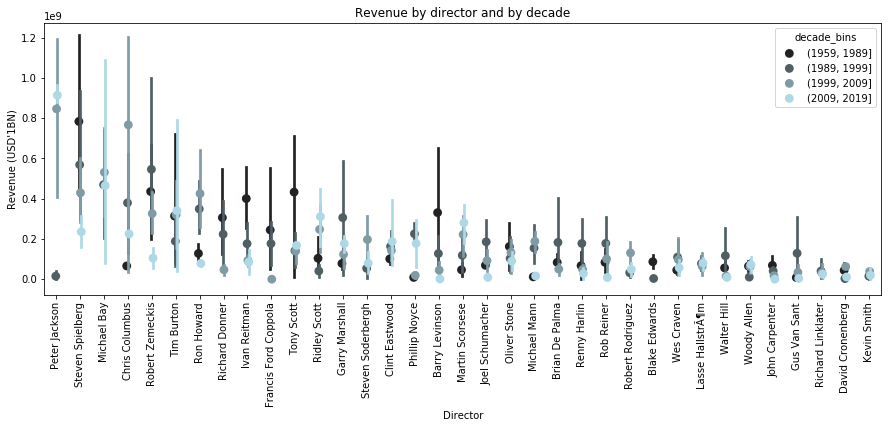

In [61]:
# here is a plot of average movie revenue and confidence interval (with bootstrapping), for each director;
# ordered from highest average grossing to lowest

plt.figure(figsize = [15,5])
g = sns.pointplot(data = df_major_directors, y = 'revenue_adj', x = 'director', hue = 'decade_bins', dodge = True,
              alpha = 0.5, linestyles = "", color = 'lightblue', order = major_directors)
plt.xticks(rotation=90)
plt.title('Revenue by director and by decade')
plt.xlabel('Director')
plt.ylabel("Revenue (USD'1BN)");

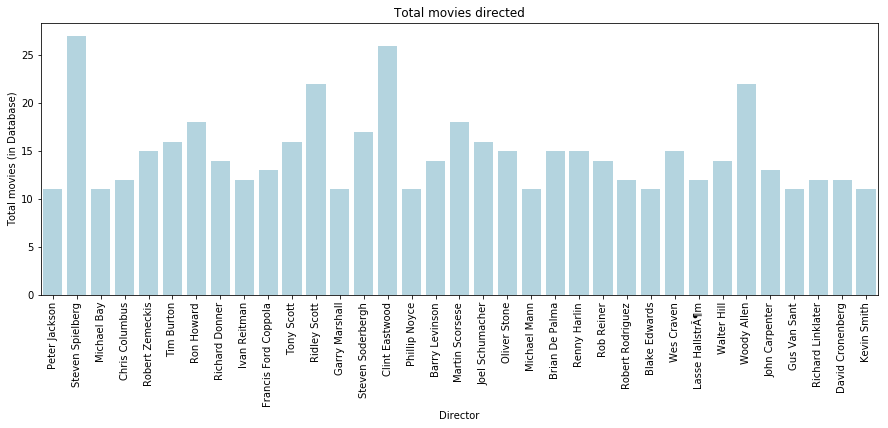

In [62]:
# here Total movies by director will is plotted in order of the average revenue earned by their movies (as above)

plt.figure(figsize = [15,5])
movies_total= df_major_directors.director.value_counts()
sns.barplot(movies_total.index, movies_total.values, color='lightblue', order=major_directors)
plt.xticks(rotation=90)
plt.title('Total movies directed')
plt.xlabel('Director')
plt.ylabel('Total movies (in Database)');

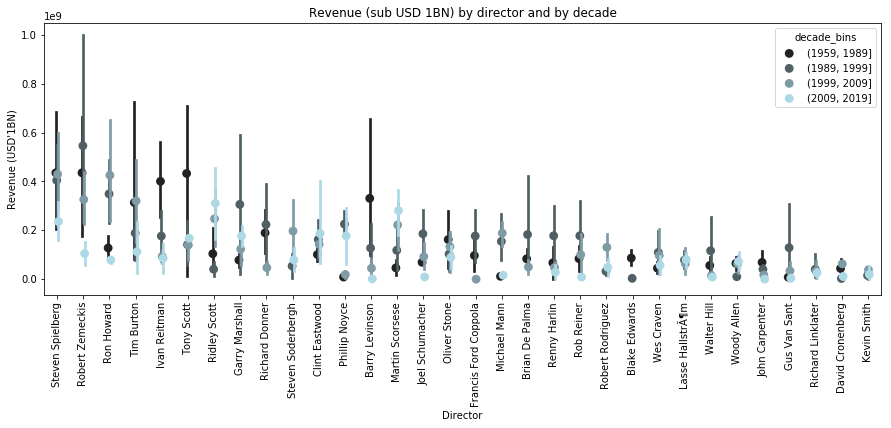

In [63]:
# I look here at the same plot, but exclude "super" movies that have earned above a billion (somewhat of outliers)

df_under_billion = df[df.revenue_adj < 10**9]
major_dir_billion = df_under_billion.director.value_counts() > 10
major_dir_billion = major_dir_billion[major_dir_billion == True].index
major_dir_billion = df_under_billion[df_under_billion.director.isin(major_dir_billion)].groupby('director')['revenue_adj'].mean().sort_values(ascending=False).index

df_major_dir_billion = df_under_billion[df_under_billion.director.isin(major_dir_billion)]

plt.figure(figsize = [15,5])
g = sns.pointplot(data = df_major_dir_billion, y = 'revenue_adj', x = 'director', hue = 'decade_bins', dodge = True,
              alpha = 0.5, linestyles = "", color = 'lightblue', order = major_dir_billion)
plt.xticks(rotation=90)
plt.title('Revenue (sub USD 1BN) by director and by decade')
plt.xlabel('Director')
plt.ylabel("Revenue (USD'1BN)");

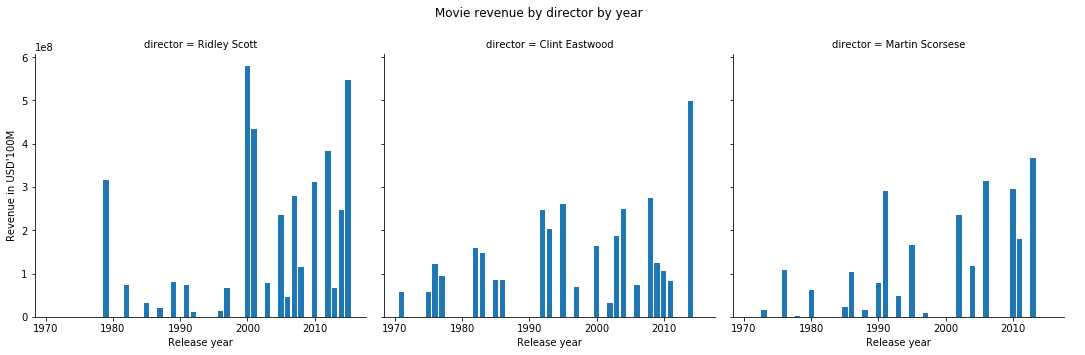

In [64]:
# here I look at track record of the few directors that have directed movies whose average renevue has gone up over time;
# for most directors, including likes of Steven Spielberg and Robert Zemeckis, while their movies brough a lot of revenue, 
# the revenue was decreasing in time

df_director = df[df.director.isin(['Ridley Scott','Clint Eastwood','Martin Scorsese'])]

g = sns.FacetGrid(df_director, col="director", height = 5)
g.map(plt.bar, "release_year", "revenue_adj");
g.add_legend()
g.set_axis_labels("Release year","Revenue in USD'100M")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Movie revenue by director by year');

#### Observations

No doubt there are some directors whose movies on average were higher grossing than those of other directors.  Some of the most successful directors were Steven Spielberg, Robert Zemeckis, Ron Howard and Tim Burton.  However, only very few directors, namely (as one can tell from above point charts, and then further exposed in bar charts),  Ridley Scott, Clint Eastwood and Martin Scorsese have directed movies that have generated more revenue as their careers progressed.

<a id='conclusions'></a>
## Conclusions


This report analysed what causes movie box office success, where success here is maximising box office revenues. It was found that:

- **Revenues** 

Movie revenues are highly scewed to the right, over half the movies (in the database, which have revenue figures) do not make more than 50 million and there are only 44 movies that made more than 1 billion. The most correlated numeric variables (with revenues) are budget, popularity, runtime, vote average; but I dismissed popularity and vote average, as they are other success measures of which one is revenue

- **Release years, decades** 

All decades (occuring from 1959 to 2019) have right scewed movie revenue distributions

- **Release months** 

It appears that months/seasons do have some correlation with box office success of movies, in particular, May, June, July and then November and December seeing higher grossing movies

- **Budget** 

there is a visible increase in correlation between budgets and revenues each decade; and also increase in budgets; without implying definite causation, possibly this is because more is spent on marketing, there are wider distribution channels, more people know same stars, same directors, prefer similar plot lines - meaning tastes may be assimilating accorss large populations, resulting in more movies designed for success, and more success and achieving the same.

- **Runtime**  

There doesn't appear to much relationship between revenue and runtime of a movie, and runtime distribution being bell shaped, slightly skewed to the right.

- **Director** 

No doubt there are some directors whose movies were on average higher grossing than thse of other directors. Some of the most successful directors were Steven Spielberg, Robert Zemeckis, Ron Howard and Tim Burton. However, only very few directors, namely (as one can tell from above point charts), Ridley Scott, Clint Eastwood and Martin Scorsese, have directed movies that have generated more revenue as their careers progressed.




## Limitations:

The report measures success as box office revenues, however, there are many other equally reasonable measures such as movie profits, votes, popularity and critics scores.  

The report is based on sub 5,000 observations (from original 10,000, of which over half has no revenue data), and it doesn't test how accurate it may be relative to population, and method of selection of these movies into this sample is unknown (other than it's from The Movie Database).

It was assumed that the data sample contains accurate and true data.

Many variables were not tested, including cast, genre, production company, all of which are likely to be correlated with movie success.